In [1]:
import math
import statistics
import numpy as np 
import scipy.stats
import pandas as pd 

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]


In [4]:
print(z)
print(z_with_nan)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [5]:
x

[8.0, 1, 2.5, 4, 28.0]

In [6]:
sum(x) / len(x) # tanpa statistics

8.7

In [7]:
mean_ = statistics.mean(x)
mean_

8.7

In [8]:
#menggunakan numpy
mean_x_np = np.mean(x)
mean_x_np

8.7

In [9]:
mean_ = y.mean()
mean_

8.7

In [10]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [11]:
#jika ada nilai NaN, tapi diabaikan
np.nanmean(y_with_nan)

8.7

In [12]:
# untuk serius juga memiliki method mean()
mean_ = z.mean()
mean_

8.7

In [13]:
z_with_nan.mean() #mean() mengabaikan nilai nan secara values

8.7

In [14]:
y_with_nan.mean()

nan

# Weighted Mean

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] *x[i] for i in range(len(x)))/ sum(w)
print(wmean)

wmean = sum(x_* w_ for (x_, w_) in zip(x,w))/sum(w)
print(wmean)

6.95
6.95


In [16]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

print(y)
print(z)
print(w)

[ 8.   1.   2.5  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
[0.1  0.2  0.3  0.25 0.15]


In [17]:
wmean = np.average(y, weights=w)
print(wmean)

6.95


In [18]:
wmean = np.average(z, weights=w)
print(wmean)

6.95


In [19]:
#cara lain adalah dengan menggunakan elemen wise product w*y dengan np.sum()
(w*y).sum()/ w.sum()

6.95

# Harmonic Mean

contoh
we travel 10 km at 60km/h , than another 10 km at 20 km/h . what is our average speed?

harmonic mean = 2/(1/60 + 1/20) = 30 km/h

harmonic juga bagus untuk handling outliner yg besar
misal 2, 4, 6, dan 100

arithmetic mean 2+4+6+100/ 4 = 28

harmonic mean = 4/(1/2 +1/4 +1/6+1/100) = 4.32

In [20]:
hmean = len(x)/ sum(1/ item for item in x)
hmean

2.7613412228796843

In [21]:
# menggunakan statistics.harmonics_mean()
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [22]:
#menggunakan scipy.stats.hmean(y)
print(y)
scipy.stats.hmean(y)

[ 8.   1.   2.5  4.  28. ]


2.7613412228796843

In [23]:
print(z)
scipy.stats.hmean(z)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64


2.7613412228796843

# Geometric Mean
example: what is the geometric Mean of 2 and 18?

1. kalikan = 2 x 18 = 26
2. lalu ambil square root =  akar36 = 6

example
* one camera has a zoom of 200 and gets and 8 in reviews

    akar(200 x 8) = 40
    

* the other has a zoom of 250 and gets an 6 in reviews

    akar(250 x 6) = 38.7

In [24]:
gmean =1

for item in x:
    gmean *= item

gmean **=1 /len(x)
gmean

4.677885674856041

In [25]:
#menggunakan scipy
scipy.stats.gmean(y)

4.67788567485604

In [26]:
scipy.stats.gmean(z)

4.67788567485604

# Median

In [27]:
 n =len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 *n)
    median_ = 0.5 *(x_ord[index-1] +x_ord[index])
        
print('median x :', median_)
print('nilai x : ', x)
print('x sorted : ', sorted(x))

median x : 4
nilai x :  [8.0, 1, 2.5, 4, 28.0]
x sorted :  [1, 2.5, 4, 8.0, 28.0]


In [28]:
x

[8.0, 1, 2.5, 4, 28.0]

In [29]:
statistics.median_low(x[:-1])

2.5

In [30]:
statistics.median_high(x[:-1])

4

In [31]:
#median(), median_low(), dan median_high() tidak mengembalikan hilai nan ketika ada titik nan diantara titik data
print('x with nan: ', x_with_nan)
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

x with nan:  [8.0, 1, 2.5, nan, 4, 28.0]
6.0
4
8.0


In [32]:
#menggunakan np.median()
median_ = np.median(y)
median_

4.0

In [33]:
#menggunakan np.median()
median_ = np.median(y[:-1])
median_

3.25

# Mode

In [34]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [35]:
#menggunakan statistics,mode()
mode_ = statistics.mode(u)
mode_

2

In [36]:
# bisa juga menggunakan scipy.stats.mode()
u,v =np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [37]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [38]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [39]:
u, v, w=pd.Series(u), pd.Series(v), pd.Series([2,2, math.nan])

print(u.mode())

0    2
dtype: int32


In [40]:
print(v.mode())

0    12
1    15
dtype: int32


In [41]:
print(w.mode())

0    2.0
dtype: float64


# Measures of Variability

In [42]:
n = len(x)

mean_ = sum(x)/n
var_ = sum((item - mean_)**2 for item in x)/(n - 1)
var_

123.19999999999999

In [43]:
var_ = statistics.variance(x)
var_

123.2

In [44]:
#menghitung variance dengan NumPy
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [45]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [46]:
z.var(ddof=1)

123.19999999999999

# Standard Deviation


In [47]:
std_ = var_ **0.5
std_

11.099549540409285

In [48]:
#menggunakan statistic.stdev()

In [49]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [50]:
#menggunakan NumPy
np.std(y, ddof=1)

11.099549540409285

In [51]:
y.std(ddof=1)

11.099549540409285

In [52]:
z.std(ddof=1)

11.099549540409285

# Skewness

In [53]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x)/n
var_ = sum((item - mean_)**2 for item in x)/(n - 1)
std_ = var_ **0.5

skew_ = (sum((item - mean_)**3 for item in x) * n/ ((n - 1)* (n - 2)* std_**3))

In [54]:
skew_

1.9470432273905929

In [55]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [56]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [57]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [58]:
z_with_nan.skew()

1.9470432273905924

# Percentiles

In [60]:
!python --version

Python 3.7.4


In [61]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [62]:
y = np.array(x)

In [63]:
np.percentile(y, 5)

-3.44

In [64]:
np.percentile(y, 95)

34.919999999999995

In [65]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [67]:
np.median(y)

8.0

In [68]:
y_with_nan = np.insert(y, 2 , np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [69]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [70]:
np.quantile(y, 0.05)

-3.44

In [72]:
np.quantile(y, 0.95)

34.919999999999995

In [73]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [75]:
#pd.Series memiliki method .quantile()
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z, z_with_nan

(0    -5.0
 1    -1.1
 2     0.1
 3     2.0
 4     8.0
 5    12.8
 6    21.0
 7    25.8
 8    41.0
 dtype: float64, 0    -5.0
 1    -1.1
 2     NaN
 3     0.1
 4     2.0
 5     8.0
 6    12.8
 7    21.0
 8    25.8
 9    41.0
 dtype: float64)

In [77]:
z.quantile(0.05)

-3.44

In [78]:
z.quantile(0.95)

34.919999999999995

In [79]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [80]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

# Range
np.ptp()

In [83]:
print(y)
print('Range y : ', np.ptp(y))

[-5.  -1.1  0.1  2.   8.  12.8 21.  25.8 41. ]
Range y :  46.0


In [88]:
print(z)
print('Range z : ', np.ptp(z))

0    -5.0
1    -1.1
2     0.1
3     2.0
4     8.0
5    12.8
6    21.0
7    25.8
8    41.0
dtype: float64
Range z :  46.0


C:\Users\aqfie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
y_with_nan

np.ptp(y_with_nan)

nan

In [87]:
np.ptp(z_with_nan)

46.0

Alternatif
* max() dan min() from the python standard library
* amax and amin() from NumPy
* nanmax() dan nanmin() from Numpy to ignore nan values
* .max() dan .min() from Numpy
* .max() and .min() from pandas to ignore nan values by default

In [90]:
np.amax(y) - np.amin(y)

46.0

In [91]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [92]:
y.max() - y.min()

46.0

In [93]:
z.max() - z.min()

46.0

In [94]:
z_with_nan.max() - z_with_nan.min()

46.0

Interquartile range
perbedaan antara kuartil pertama dan ketiga

In [97]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [101]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] -quartiles[0.25]

20.9

# Summary of Descriptive Statistics

In [102]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

* nobs : the number of observations or elements in your dataset
* minmax : the tuple with the minimum and maximum values of your dataset
* mean 
* variance
* skewness
* kurtosis

In [104]:
print(y)

[-5.  -1.1  0.1  2.   8.  12.8 21.  25.8 41. ]


In [106]:
result.nobs

9

In [107]:
result.minmax[0] # Min

-5.0

In [108]:
result.minmax[1] # Max

41.0

In [109]:
result.mean

11.622222222222222

In [110]:
result.variance

228.75194444444446

In [111]:
result.skewness

0.9249043136685094

In [112]:
result.kurtosis

0.14770623629658886

In [113]:
# Pandas memiliki fungsi serupa yakni. describe()
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

# Measures of correlation between pairs of data

In [115]:
x = list(range(-10,11))
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [116]:
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11 , 12, 14]

In [117]:
x_, y_ = np.array(x), np.array(y)

In [118]:
x__, y__ = pd.Series(x_), pd.Series(y_)

## Covariance
sample covariance adalah ukuran yang mengukur kekuatan arah dan hubungan antara sepasang variable


In [119]:
n = len(x)
mean_x, mean_y =  sum(x)/n, sum(y)/n

In [120]:
cov_xy = (sum((x[k] - mean_x) *(y[k] -mean_y) for k in range(n)) / (n-1))

cov_xy

19.95

In [121]:
cov_matrix =  np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [122]:
x_.var(ddof=1)

38.5

In [123]:
y_.var(ddof=1)

13.914285714285711

In [125]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [126]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [127]:
# series pandas memiliki .cov() untuk menghitung kovarian
cov_xy = x__.cov(y__)
cov_xy

19.95

In [128]:
cov_xy = y__.cov(x__)
cov_xy

19.95

## Correlation Coeficient
dilambangkan dengan simbol r

Cofficient adalah ukuran lain dari ukuran antar data 

In [129]:
var_x = sum((item - mean_x)**2 for item in x)/ (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n-1)
std_x, std_y = var_x ** 0.5, var_y **0.5
r = cov_xy / (std_x *std_y)
r

0.861950005631606

In [130]:
#scipy.stats memiliki pearsonr() yang menghitung correlation coefficient dan p-value

r,p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316061

In [131]:
p #p-value

5.122760847201135e-07

In [132]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [133]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [134]:
r = corr_matrix[1, 0]
r

0.861950005631606

In [135]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979)

In [136]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [138]:
## Series memiliki .corr() untuk menghitung correlation coefficient
r = x__.corr(y__)
r

0.8619500056316061

In [139]:
r = y__.corr(x__)
r

0.861950005631606

# Working with 2D Data


## Axes

In [140]:
# start by creating a @D NumPy array:

a = np.array([[1,1,1],
              [2,3,1],
              [4,9,2],
              [8,27,4],
              [16,1,1]
             ])

a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [141]:
np.mean(a)

5.4

In [142]:
a.mean()

5.4

In [143]:
np.median(a)

2.0

In [144]:
a.var(ddof=1)

53.40000000000001

* Axis = None untuk seluruh data
* Axis = 0 
* Axis = 1 

In [146]:
print(a)

[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]


In [147]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [148]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [149]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [150]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [151]:
np.median(a, axis=0)

array([4., 3., 1.])

In [153]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [154]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [155]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [156]:
#untuk scipy default axis = 0
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [157]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [158]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [159]:
#untuk seluruh dataset
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [160]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [161]:
scipy.stats.describe(a, ddof=1, bias=False) # default axis=0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [162]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [163]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [176]:
row_names = ['first','second','third',' fourth','fifth']
col_names = ['A','B','C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [177]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [178]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [179]:
df.median()

A    4.0
B    3.0
C    1.0
dtype: float64

In [180]:
df.mean(axis=1)

first       1.0
second      2.0
third       5.0
 fourth    13.0
fifth       6.0
dtype: float64

In [181]:
df.mean(axis=0)

A    6.2
B    8.2
C    1.8
dtype: float64

In [182]:
df['A']

first       1
second      2
third       4
 fourth     8
fifth      16
Name: A, dtype: int32

In [183]:
df['A'].mean()

6.2

In [184]:
df['A'].var()

37.20000000000001

In [185]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

# Visualizing Data (Optional)

In [189]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Box Plots

In [190]:
np.random.seed(seed=0)

In [191]:
x = np.random.random(1000)

In [192]:
y =  np.random.random(100)

In [193]:
z = np.random.random(10)

C:\Users\aqfie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


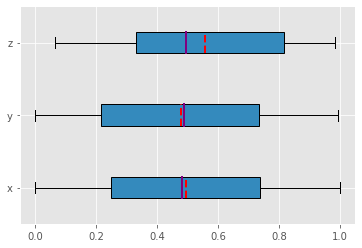

In [196]:
fig , ax = plt.subplots()
ax.boxplot((x,y,z), vert=False, showmeans=True, meanline=True, 
labels=('x','y','z'), patch_artist=True, medianprops={'linewidth':2, 'color':'purple'},
          meanprops = {'linewidth':2, 'color':'red'})
plt.show()

In [198]:
hist, bin_edges = np.histogram(x, bins=10)

In [199]:
hist

array([101,  99, 108, 107, 102,  93,  99,  88,  95, 108], dtype=int32)

In [200]:
bin_edges

array([5.45964897e-04, 1.00472226e-01, 2.00398488e-01, 3.00324749e-01,
       4.00251010e-01, 5.00177272e-01, 6.00103533e-01, 7.00029794e-01,
       7.99956055e-01, 8.99882317e-01, 9.99808578e-01])

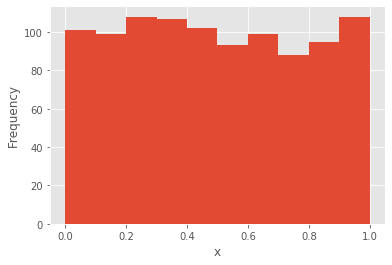

In [203]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

## Pie Charts

In [204]:
x, y, z = 128, 256, 1024

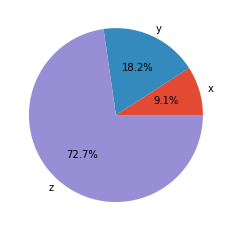

In [205]:
fig, ax = plt.subplots()
ax.pie((x,y,z), labels=('x','y','z'), autopct='%1.1f%%')
plt.show()

## Bar Charts

In [206]:
x = np.arange(21)

In [207]:
y = np.random.randint(21, size=21)

In [208]:
err = np.random.randn(21)

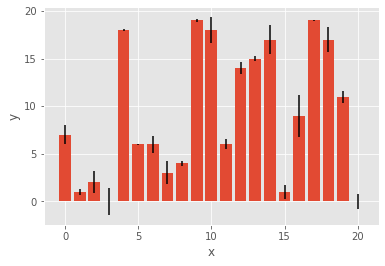

In [209]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## X-Y Plots

In [210]:
x = np.arange(21)

In [211]:
y = 5 + 2 * x + 2 * np.random.randn(21)

In [212]:
slope, intercept ,r , *__ = scipy.stats.linregress(x, y)
line= f'Regression line: y+{intercept:.2f}+{slope:.2f}x, r={r:.2f}'

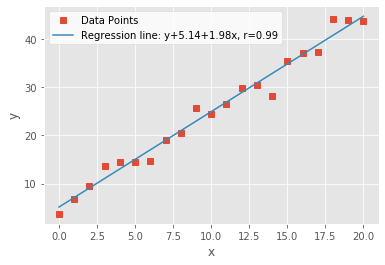

In [214]:
fig, ax = plt.subplots()
ax.plot(x, y , linewidth=0, marker='s', label='Data Points')
ax.plot(x, intercept+ slope* x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmaps

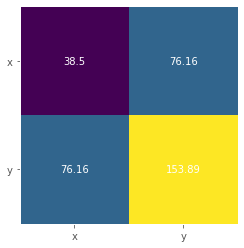

In [215]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center',va='center', color='w')
plt.show()

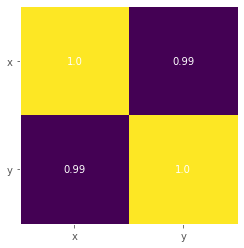

In [216]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center',va='center', color='w')
plt.show()